In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/interview-resume-query-matching/train_dataset.csv
/kaggle/input/interview-resume-query-matching/test_dataset.csv


In [3]:
train_fn = "/kaggle/input/interview-resume-query-matching/train_dataset.csv"
test_fn = "/kaggle/input/interview-resume-query-matching/test_dataset.csv"

In [4]:
train_df = pd.read_csv(train_fn)
train_df.head()

,candidateAId,candidateBId,winnerId,candidateATranscript,candidateBTranscript,candidateAResume,candidateBResume,role
0,8ab47434-09a9-44e6-8c77-f9fd20c57765,d7cbd002-5423-4dae-82d9-3a629ec361bb,8ab47434-09a9-44e6-8c77-f9fd20c57765,{'pairs': [['Interviewer: Hello and welcome to...,{'pairs': [['Interviewer: Hello and welcome to...,"{""data"": {""awards"": [], ""certifications"": [], ...","{""data"": {""awards"": [], ""certifications"": [], ...",communications
1,53c11bf9-3ec7-4909-a9d1-487692e72415,e957aff1-583b-11ef-8a84-4201ac164110,e957aff1-583b-11ef-8a84-4201ac164110,{'pairs': [['Interviewer: Hello and welcome to...,{'pairs': [['Interviewer: Hello! This is a sho...,"{""data"": {""awards"": [], ""certifications"": [], ...","{""data"": {""awards"": [], ""certifications"": [], ...",ops-or-gtm
2,4617b14d-ca26-11ee-a4ba-42010a400021,a2d2933e-c5bb-11ee-a4ba-42010a400021,4617b14d-ca26-11ee-a4ba-42010a400021,{'pairs': [['Interviewer: Hello and welcome to...,{'pairs': [['Interviewer: Hello and welcome to...,"{""data"": {""awards"": [""1st (Winner) AIR 8"", ""Am...","{""data"": {""awards"": [], ""certifications"": [""In...",has-scraping-experience-a
3,c227ffa7-c459-11ee-a4ba-42010a400021,e0abf437-c7b8-11ee-a4ba-42010a400021,c227ffa7-c459-11ee-a4ba-42010a400021,{'pairs': [['Interviewer: Hello and welcome to...,{'pairs': [['Interviewer: Hello and welcome to...,"{""data"": {""awards"": [], ""certifications"": [""Ma...","{""data"": {""awards"": [""Data Science Certificate...",ml-engineer-v3
4,fd4e9be6-c4f2-11ee-a4ba-42010a400021,264bd6d6-cca8-11ee-a4ba-42010a400021,fd4e9be6-c4f2-11ee-a4ba-42010a400021,{'pairs': [['Interviewer: Hello and welcome to...,{'pairs': [['Interviewer: Hello and welcome to...,"{""data"": {""awards"": [], ""certifications"": [], ...","{""data"": {""awards"": [], ""certifications"": [""AW...",full-stack-engineer-with-experience-in-next-an...


In [5]:
train_df.iloc[0,:]

candidateAId                         8ab47434-09a9-44e6-8c77-f9fd20c57765
candidateBId                         d7cbd002-5423-4dae-82d9-3a629ec361bb
winnerId                             8ab47434-09a9-44e6-8c77-f9fd20c57765
candidateATranscript    {'pairs': [['Interviewer: Hello and welcome to...
candidateBTranscript    {'pairs': [['Interviewer: Hello and welcome to...
candidateAResume        {"data": {"awards": [], "certifications": [], ...
candidateBResume        {"data": {"awards": [], "certifications": [], ...
role                                                       communications
Name: 0, dtype: object

In [6]:
train_df.role.value_counts()

role
communications                                                  3
ops-or-gtm                                                      3
headhunter-or-recruiter                                         2
writer                                                          2
technical-project-manager-v3                                    2
has-scraping-experience-a                                       1
ml-engineer-v3                                                  1
full-stack-engineer-with-experience-in-next-and-typescript-a    1
backend-engineer-who-s-worked-at-a-startup-v3                   1
leetcode-expert-b                                               1
leetcode-expert-a                                               1
financial-advisor                                               1
marketer                                                        1
Name: count, dtype: int64

# Data Prepocessing

In [29]:
df = train_df.copy()

In [30]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
# Create a new column "winner" based on the condition
df["winner"] = (df["winnerId"] == df["candidateAId"]).astype(int)

<Axes: xlabel='winner'>

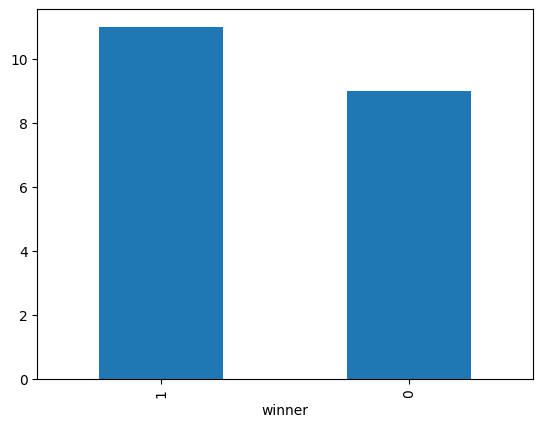

In [183]:
df["winner"].value_counts().plot(kind = 'bar')

In [32]:
df.iloc[0]

candidateAId                         8ab47434-09a9-44e6-8c77-f9fd20c57765
candidateBId                         d7cbd002-5423-4dae-82d9-3a629ec361bb
winnerId                             8ab47434-09a9-44e6-8c77-f9fd20c57765
candidateATranscript    {'pairs': [['Interviewer: Hello and welcome to...
candidateBTranscript    {'pairs': [['Interviewer: Hello and welcome to...
candidateAResume        {"data": {"awards": [], "certifications": [], ...
candidateBResume        {"data": {"awards": [], "certifications": [], ...
role                                                       communications
winner                                                                  1
Name: 0, dtype: object

In [33]:
df.isnull().sum()

candidateAId            0
candidateBId            0
winnerId                0
candidateATranscript    0
candidateBTranscript    0
candidateAResume        0
candidateBResume        0
role                    0
winner                  0
dtype: int64

In [34]:
# Preprocess the text data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return''.join(tokens)

In [36]:
df['candidateATranscript'] = df['candidateATranscript'].apply(preprocess_text)
df['candidateBTranscript'] = df['candidateBTranscript'].apply(preprocess_text)
df['candidateAResume'] = df['candidateAResume'].apply(preprocess_text)
df['candidateBResume'] = df['candidateBResume'].apply(preprocess_text)


0     {'pairs':[['Interviewer:HellowelcomeAIintervie...
1     {'pairs':[['Interviewer:HellowelcomeAIintervie...
2     {'pairs':[['Interviewer:HellowelcomeAIintervie...
3     {'pairs':[['Interviewer:HellowelcomeAIintervie...
4     {'pairs':[['Interviewer:HellowelcomeAIintervie...
5     {'pairs':[['Interviewer:HellowelcomeAIintervie...
6     {'pairs':[['Interviewer:HellowelcomeAIintervie...
7     {'pairs':[['Interviewer:HellowelcomeAIintervie...
8     {'pairs':[['Interviewer:HellowelcomeAIintervie...
9     {'pairs':[['Interviewer:HellowelcomeAIintervie...
10    {'pairs':[['Interviewer:HellowelcomeAIintervie...
11    {'pairs':[['Interviewer:HellowelcomeAIintervie...
12    {'pairs':[['Interviewer:HellowelcomeAIintervie...
13    {'pairs':[['Interviewer:HellowelcomeAIintervie...
14    {'pairs':[['Interviewer:WelcomeAIinterview!Thi...
15    {'pairs':[['Interviewer:HellowelcomeAIintervie...
16    {'pairs':[['Interviewer:HellowelcomeAIintervie...
17    {'pairs':[['Interviewer:HellowelcomeAIinte

In [37]:
# Extract features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df[['candidateATranscript', 'candidateBTranscript', 'candidateAResume', 'candidateBResume']])
y = df['winner']


In [38]:
X.shape, y.shape

((4, 4), (20,))

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [4, 20]

In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Zero Shot classification

## Testing the methods for the solution

In [42]:
import json
from transformers import pipeline
from typing import Dict, Any

In [57]:
sample_data = train_df.iloc[0]

In [58]:
def parse_transcript(transcript: str) -> str:
    """Parse the transcript JSON string and return a formatted string."""
    transcript_data = json.loads(transcript)
    formatted_transcript = ""
    for pair in transcript_data["pairs"]:
        formatted_transcript += f"Interviewer: {pair[0]}\nInterviewee: {pair[1]}\n\n"
    return formatted_transcript.strip()

In [59]:
sample_data.index

Index(['candidateAId', 'candidateBId', 'winnerId', 'candidateATranscript',
       'candidateBTranscript', 'candidateAResume', 'candidateBResume', 'role'],
      dtype='object')

In [60]:
type(sample_data['candidateATranscript']),sample_data['candidateATranscript']

(str,
 '{\'pairs\': [[\'Interviewer: Hello and welcome to the AI interview! This interview will consist of basic questions about your background as well as some high-level questions about the skills you listed on your application. Ensure that you minimize long pauses during your responses, otherwise you may be cut off prematurely. Are you ready to start the interview? \\n\', \'Interviewee: Yes. Yes.\\n\\n\'], ["Interviewer: Great! I see from your resume that you\'ve worked extensively on brand communication and content strategy development. Can you walk me through a specific example of how you tailored messaging for a startup client, and what key factors you considered in that process?  \\n\\n", \'Interviewee: I worked for a startup called Peacefully, which helps individuals work through end of life necessities and\\n\\n\'], [\'Interviewer: That sounds like a challenging but important project. How did you approach the tone and style of the messaging for Peacefully, considering the sens

In [61]:
data = sample_data['candidateATranscript']

In [62]:
data

'{\'pairs\': [[\'Interviewer: Hello and welcome to the AI interview! This interview will consist of basic questions about your background as well as some high-level questions about the skills you listed on your application. Ensure that you minimize long pauses during your responses, otherwise you may be cut off prematurely. Are you ready to start the interview? \\n\', \'Interviewee: Yes. Yes.\\n\\n\'], ["Interviewer: Great! I see from your resume that you\'ve worked extensively on brand communication and content strategy development. Can you walk me through a specific example of how you tailored messaging for a startup client, and what key factors you considered in that process?  \\n\\n", \'Interviewee: I worked for a startup called Peacefully, which helps individuals work through end of life necessities and\\n\\n\'], [\'Interviewer: That sounds like a challenging but important project. How did you approach the tone and style of the messaging for Peacefully, considering the sensitive n

In [74]:
small_data = '{\'pairs\': [[\'Interviewer: Hello and welcome to the AI interview! This interview will consist of basic questions about your background as well as some high-level questions about the skills you listed on your application. Ensure that you minimize long pauses during your responses, otherwise you may be cut off prematurely. Are you ready to start the interview? \\n\', \'Interviewee: Yes. Yes.\\n\\n\'], ["Interviewer: Great! I see from your resume that you\'ve worked extensively on brand communication and content strategy development. Can you walk me through a specific example of how you tailored messaging for a startup client, and what key factors you considered in that process?  \\n\\n", \'Interviewee: I worked for a startup called Peacefully, which helps individuals work through end of life necessities and\\n\\n\'], [\'Interviewer: That sounds like a challenging but important project. How did you approach the tone and style of the messaging for Peacefully, considering the sensitive nature of the services they provide?  \\n\\n\', "Interviewee: Yeah. That was a that\'s a great question. And I, uh, what we did was we focused on being we looked around, first of all, competitors and saw how, uh, the other businesses that were in the same space spoke because, uh, one way that we recognize to stand out was have distinction in our brand voice. And we recognized that there was, uh, a lot of coldness in their tone. So we really worked on being as empathetic as possible, especially as you mentioned given the sensitive nature of the work. And so we looked at every communication on Instagram, etcetera, and made sure that it sounded like a human being, and that it also sounded like it was, um, even though we were providing necessary information, it was put in such a way that it was considered of where a person may be in their life in terms of potentially having just experienced a loss.\\n\\n"], ] }'

In [75]:
small_data= small_data.replace("\'pairs\'", "\"pairs\"")

In [78]:
small_data

'{\\\'pairs\\\': [[\\\'Interviewer: Hello and welcome to the AI interview! This interview will consist of basic questions about your background as well as some high-level questions about the skills you listed on your application. Ensure that you minimize long pauses during your responses, otherwise you may be cut off prematurely. Are you ready to start the interview? \\\\n\\\', \\\'Interviewee: Yes. Yes.\\\\n\\\\n\\\'], ["Interviewer: Great! I see from your resume that you\\\'ve worked extensively on brand communication and content strategy development. Can you walk me through a specific example of how you tailored messaging for a startup client, and what key factors you considered in that process?  \\\\n\\\\n", \\\'Interviewee: I worked for a startup called Peacefully, which helps individuals work through end of life necessities and\\\\n\\\\n\\\'], [\\\'Interviewer: That sounds like a challenging but important project. How did you approach the tone and style of the messaging for Peace

In [76]:
transcript_data = json.loads(data)

JSONDecodeError: Expecting ',' delimiter: line 1 column 451 (char 450)

In [ ]:
for pair in transcript_data["pairs"]:
    formatted_transcript += f"Interviewer: {pair[0]}\nInterviewee: {pair[1]}\n\n"
    break    

In [15]:
parse_transcript(sample_data['candidateATranscript'])

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [ ]:
def parse_resume(resume: Dict[str, Any]) -> str:
    """Parse the resume dictionary and return a formatted string."""
    data = resume["data"]
    formatted_resume = ""
    
    if data["education"]:
        edu = data["education"][0]
        formatted_resume += f"Education: {edu['degree']} from {edu['school']}, GPA: {edu['GPA']}\n"
    
    if data["projects"]:
        proj = data["projects"][0]
        formatted_resume += f"Project: {proj['projectName']} - {proj['projectDescription']}\n"
    
    if data["skills"]:
        formatted_resume += f"Skills: {', '.join(data['skills'])}\n"
    
    if data["workExperience"]:
        work = data["workExperience"][0]
        formatted_resume += f"Work Experience: {work.get('jobTitle', 'N/A')} at {work.get('company', 'N/A')}\n"
    
    return formatted_resume.strip()

In [ ]:
def prepare_candidate_info(transcript: str, resume: Dict[str, Any]) -> str:
    """Combine transcript and resume information into a single string."""
    parsed_transcript = parse_transcript(transcript)
    parsed_resume = parse_resume(resume)
    return f"Interview Transcript:\n{parsed_transcript}\n\nResume:\n{parsed_resume}"

In [123]:
def select_candidate(candidate_a_info: str, candidate_b_info: str, role: str, classifier) -> str:
    """Use zero-shot classification to select the best candidate for the role."""
    combined_text = f"Role: {role}\n\nCandidate A:\n{candidate_a_info}\n\nCandidate B:\n{candidate_b_info}\n\nWhich candidate is a better fit for the role?"
    
    result = classifier(combined_text, candidate_labels=["A", "B"], hypothesis_template="This {} is a good fit for the role.")
    
    return result["labels"][0]

### HF model pipeline

In [174]:
sample_data = train_df.iloc[1]

In [175]:
sample_data.index

Index(['candidateAId', 'candidateBId', 'winnerId', 'candidateATranscript',
       'candidateBTranscript', 'candidateAResume', 'candidateBResume', 'role'],
      dtype='object')

In [176]:
candidate_a_info = sample_data['candidateATranscript'] + sample_data['candidateAResume'] 
candidate_b_info = sample_data['candidateBTranscript'] + sample_data['candidateBResume'] 

In [177]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [178]:
role = sample_data['role']

In [179]:
# Select the best candidate
selected_candidate = select_candidate(candidate_a_info, candidate_b_info, role, classifier)

In [180]:
selected_candidate

'A'

In [130]:
import time

In [169]:
def process_candidate(sample_data):
    # direct concatenating the phrases is also taking a lot of time
    candidate_a_info = sample_data['candidateATranscript'] + sample_data['candidateAResume'] 
    candidate_b_info = sample_data['candidateBTranscript'] + sample_data['candidateBResume'] 

    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

    role = sample_data['role']
    
    time.sleep(4)
    print(f' role\n {role}  ')
    selected_candidate = select_candidate(candidate_a_info, candidate_b_info, role, classifier)
#     selected_candidate = 'checking'
    time.sleep(3)
    print(f' selected_candidate\n {selected_candidate}  ')
    return selected_candidate

In [170]:
small_df = train_df.head(5)
small_df

,candidateAId,candidateBId,winnerId,candidateATranscript,candidateBTranscript,candidateAResume,candidateBResume,role
0,8ab47434-09a9-44e6-8c77-f9fd20c57765,d7cbd002-5423-4dae-82d9-3a629ec361bb,8ab47434-09a9-44e6-8c77-f9fd20c57765,{'pairs': [['Interviewer: Hello and welcome to...,{'pairs': [['Interviewer: Hello and welcome to...,"{""data"": {""awards"": [], ""certifications"": [], ...","{""data"": {""awards"": [], ""certifications"": [], ...",communications
1,53c11bf9-3ec7-4909-a9d1-487692e72415,e957aff1-583b-11ef-8a84-4201ac164110,e957aff1-583b-11ef-8a84-4201ac164110,{'pairs': [['Interviewer: Hello and welcome to...,{'pairs': [['Interviewer: Hello! This is a sho...,"{""data"": {""awards"": [], ""certifications"": [], ...","{""data"": {""awards"": [], ""certifications"": [], ...",ops-or-gtm
2,4617b14d-ca26-11ee-a4ba-42010a400021,a2d2933e-c5bb-11ee-a4ba-42010a400021,4617b14d-ca26-11ee-a4ba-42010a400021,{'pairs': [['Interviewer: Hello and welcome to...,{'pairs': [['Interviewer: Hello and welcome to...,"{""data"": {""awards"": [""1st (Winner) AIR 8"", ""Am...","{""data"": {""awards"": [], ""certifications"": [""In...",has-scraping-experience-a
3,c227ffa7-c459-11ee-a4ba-42010a400021,e0abf437-c7b8-11ee-a4ba-42010a400021,c227ffa7-c459-11ee-a4ba-42010a400021,{'pairs': [['Interviewer: Hello and welcome to...,{'pairs': [['Interviewer: Hello and welcome to...,"{""data"": {""awards"": [], ""certifications"": [""Ma...","{""data"": {""awards"": [""Data Science Certificate...",ml-engineer-v3
4,fd4e9be6-c4f2-11ee-a4ba-42010a400021,264bd6d6-cca8-11ee-a4ba-42010a400021,fd4e9be6-c4f2-11ee-a4ba-42010a400021,{'pairs': [['Interviewer: Hello and welcome to...,{'pairs': [['Interviewer: Hello and welcome to...,"{""data"": {""awards"": [], ""certifications"": [], ...","{""data"": {""awards"": [], ""certifications"": [""AW...",full-stack-engineer-with-experience-in-next-an...


In [171]:
from tqdm import tqdm

In [172]:
small_df['pred'] = small_df.apply(lambda row : process_candidate(row),axis=1)

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


 role
 communications  
 selected_candidate
 A  
 role
 ops-or-gtm  
 selected_candidate
 A  
 role
 has-scraping-experience-a  
 selected_candidate
 A  
 role
 ml-engineer-v3  
 selected_candidate
 A  
 role
 full-stack-engineer-with-experience-in-next-and-typescript-a  
 selected_candidate
 A  


/tmp/ipykernel_36/3517585528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['pred'] = small_df.apply(lambda row : process_candidate(row),axis=1)


In [173]:
small_df['pred']
# the only wrong prediction is at index2, otherwise this is working fine.

0    A
1    A
2    A
3    A
4    A
Name: pred, dtype: object